# Homework 1 - Richard Todd

In [1]:
#display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read the CSV file into a pandas dataframe. (1 pt)
bike_df = pd.read_csv('../data/65db-xm6k.csv')


In [4]:
#quick look at data
bike_df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [5]:
bike_df.shape

(65688, 4)

In [6]:
#check types
bike_df.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [7]:
#coerce date column to a datetime format - can infer format as small df
bike_df.Date = pd.to_datetime(bike_df.Date, infer_datetime_format=True)

In [8]:
#Add columns to the dataframe containing: ( 3 pt)
#The total (East + West) bicycle count
bike_df["total_count"] = bike_df["Fremont Bridge East Sidewalk"] + bike_df["Fremont Bridge West Sidewalk"]
#The hour of the day
bike_df['hour_of_day'] = bike_df.Date.dt.hour
#The year
bike_df['year'] = bike_df.Date.dt.year


In [9]:
#Create a dataframe with the subset of data from the year 2016 (1 pt)
bike_df_subset = bike_df[bike_df['year']==2016]

In [10]:
#check max and min dates...
min(bike_df_subset.Date)
max(bike_df_subset.Date)

Timestamp('2016-01-01 00:00:00')

Timestamp('2016-12-31 23:00:00')

<BarContainer object of 24 artists>

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Counts of bicycles crossing the Fremont Bridge by hour (2012-date)')

Text(0.99, 0.01, 'Source: City of Seattle Open Data')

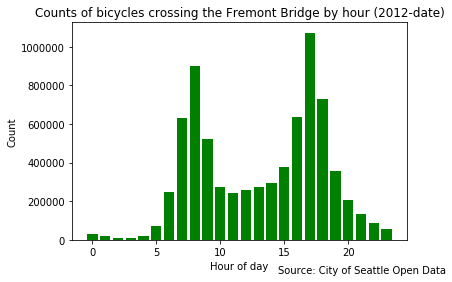

In [11]:
#Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)
#assuming that that single grouped series is preferred to a yearly series

#create grouped df
graph_df = bike_df[['hour_of_day','total_count']].groupby(by="hour_of_day").sum()

#plot
%matplotlib inline
plt.bar(graph_df.index, graph_df.total_count, color='green')
plt.xlabel("Hour of day")
plt.ylabel("Count")
plt.title("Counts of bicycles crossing the Fremont Bridge by hour (2012-date)")
plt.figtext(0.99, 0.01, 'Source: City of Seattle Open Data', horizontalalignment='right')
plt.show()

In [12]:
#Use pandas to determine what is (on average) the busiest hour of the day (1 pt)
bike_df[['hour_of_day','total_count']].groupby(by="hour_of_day").mean().sort_values("total_count",ascending=False)

#5pm-6pm is on average the busiest hour of the day
#(by total crossing count, and based on an interpretation of the metadata about the Date field)

,total_count
hour_of_day,
17,392.289003
8,328.783339
18,265.710632
16,232.024114
7,231.050055
9,191.395102
15,138.525027
19,129.591158
14,108.267446
